 # Social Media Sentiment Analysis

## Importing Libraries

In [4]:
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load Dataset

In [5]:
df = pd.read_csv(
    "C:/Users/amanj/Project/Sentiment Analysis/Dataset/twitter_training.csv",
    header=None,
    names=['id', 'entity', 'sentiment', 'text']
)

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Dataset shape: (74682, 4)
Columns: ['id', 'entity', 'sentiment', 'text']
     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [6]:
df

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


# Text Preprocessing

In [7]:
# Load English NLP model
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r"@\w+", '', text)  # remove mentions
    text = re.sub(r"[^a-z\s]", '', text)  # remove punctuation/numbers
    doc = nlp(text)
    tokens = [t.lemma_ for t in doc if t.lemma_ not in stop_words and t.lemma_.strip()]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
print(df[['text', 'clean_text', 'sentiment']].head())


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                    clean_text sentiment  
0    I get borderland I murder  Positive  
1         I come border I kill  Positive  
2      I get borderland I kill  Positive  
3   I come borderland I murder  Positive  
4  I get borderland I murder I  Positive  


# VADER Sentiment Analysis

In [8]:

analyzer = SentimentIntensityAnalyzer()

def vader_label(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['clean_text'].apply(vader_label)


In [9]:
# Compare dataset sentiment vs VADER
print(df[['sentiment', 'vader_sentiment']].head())

  sentiment vader_sentiment
0  Positive        Negative
1  Positive        Negative
2  Positive        Negative
3  Positive        Negative
4  Positive        Negative


# Sentiment Distribution

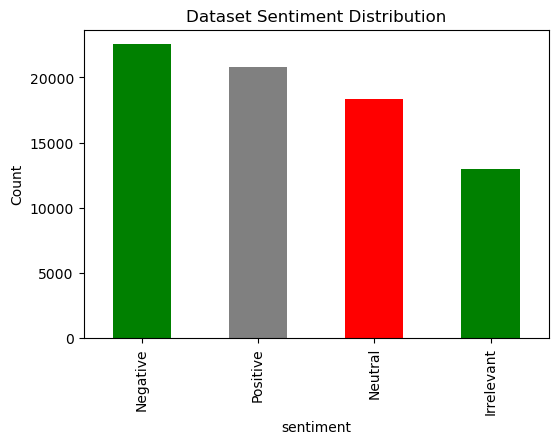

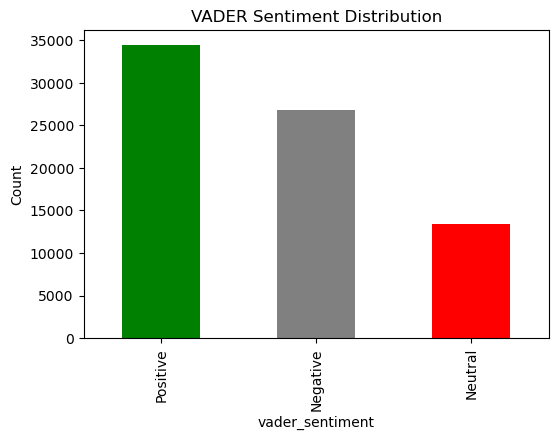

In [10]:
plt.figure(figsize=(6,4))
df['sentiment'].value_counts().plot(kind='bar', color=['green','grey','red'])
plt.title("Dataset Sentiment Distribution")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
df['vader_sentiment'].value_counts().plot(kind='bar', color=['green','grey','red'])
plt.title("VADER Sentiment Distribution")
plt.ylabel("Count")
plt.show()

# 5. Word Clouds

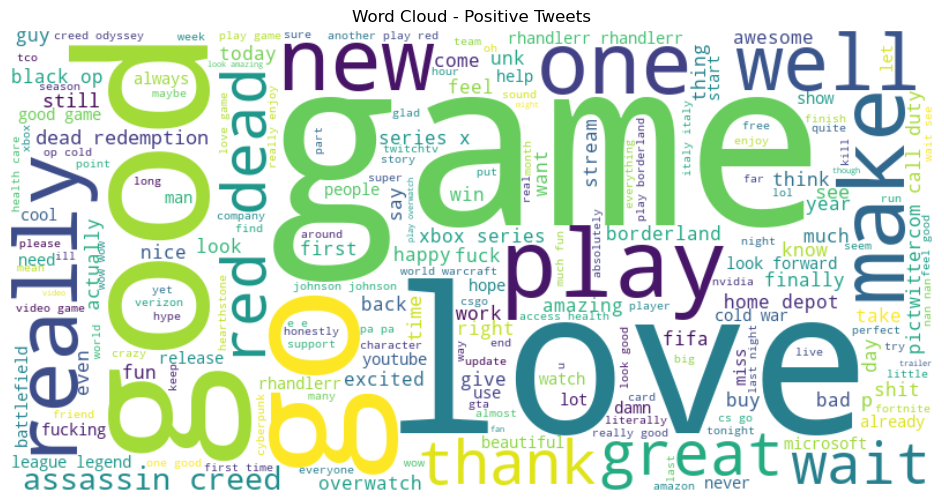

In [11]:
# Positive tweets
pos_text = " ".join(df[df['sentiment']=='Positive']['clean_text'])
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(12,6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Tweets")
plt.show()


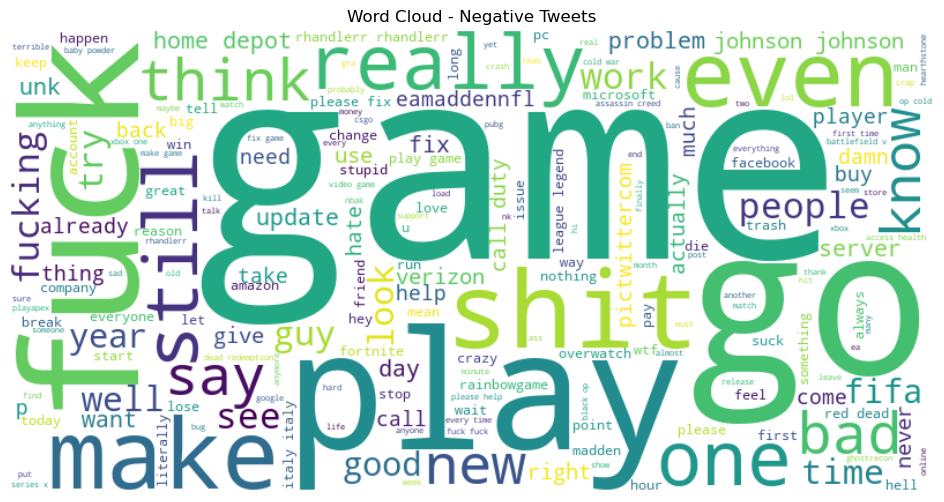

In [12]:
# Negative tweets
neg_text = " ".join(df[df['sentiment']=='Negative']['clean_text'])
wc_neg = WordCloud(width=800, height=400, background_color='white').generate(neg_text)
plt.figure(figsize=(12,6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Tweets")
plt.show()


In [13]:
#Saved preprocessed data
df.to_csv("twitter_preprocessed.csv", index=False)
print("Preprocessed dataset saved as twitter_preprocessed.csv")

Preprocessed dataset saved as twitter_preprocessed.csv


# Recommend strategies to improve brand perception.

1️⃣ Identify Key Pain Points

Use sentiment spikes (negative tweets) to detect recurring complaints or frustrations.

Example: If “Borderlands” has negative spikes around game updates, prioritize fixing bugs or clarifying updates.

Strategy: Create a dedicated feedback response team to quickly address frequent complaints.

2️⃣ Amplify Positive Experiences

Analyze positive sentiment tweets to understand what customers love.

Example: Users praising Nvidia’s performance or drivers.

Strategy: Highlight these experiences through retweets, testimonials, or marketing campaigns to strengthen brand credibility.

3️⃣ Engage with Customers Proactively

Track neutral or mixed sentiment tweets—they often indicate uncertainty.

Example: Users unsure about product features or compatibility.

Strategy: Launch targeted social media campaigns, tutorials, FAQs, or live Q&A sessions to clarify doubts.

4️⃣ Monitor Trends and Timing

Analyze sentiment over time to identify when perception worsens or improves.

Example: Negative spikes after software updates or product launches.

Strategy: Plan proactive communication around launches—release notes, guides, and community engagement to preempt negative reactions.

5️⃣ Personalize Communication

Use entity-level sentiment to segment audiences by interest or product experience.

Example: Tailor campaigns separately for Nvidia GPU users versus general PC gamers.

Strategy: Deliver relevant content, promotions, or support based on sentiment and user segment to increase satisfaction.